<a href="https://colab.research.google.com/github/PrinscaK/Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/training_data.csv')

In [ ]:
input_data = data[['Vds','Vgs']]
target_data = data[['Id']]

In [ ]:
# Load SPICE simulation data (replace with your data loading code)
scaler_input = MinMaxScaler()
scaler_output = MinMaxScaler()
input_data_normalized = scaler_input.fit_transform(input_data)
target_data_normalized = scaler_output.fit_transform(target_data)

X_train, X_test, y_train, y_test = train_test_split(input_data_normalized, target_data_normalized, test_size=0.2, random_state=42)

# Normalize input and output data
# Normalize the input features



In [ ]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
507/507 [==============================] - 3s 3ms/step - loss: 0.0057 - val_loss: 7.0078e-04
Epoch 2/10
507/507 [==============================] - 1s 3ms/step - loss: 3.4595e-04 - val_loss: 2.1291e-04
Epoch 3/10
507/507 [==============================] - 1s 3ms/step - loss: 1.0814e-04 - val_loss: 1.0482e-04
Epoch 4/10
507/507 [==============================] - 1s 3ms/step - loss: 4.5397e-05 - val_loss: 4.1783e-05
Epoch 5/10
507/507 [==============================] - 2s 3ms/step - loss: 3.0620e-05 - val_loss: 2.1587e-05
Epoch 6/10
507/507 [==============================] - 2s 3ms/step - loss: 2.5822e-05 - val_loss: 1.9107e-05
Epoch 7/10
507/507 [==============================] - 2s 3ms/step - loss: 2.2489e-05 - val_loss: 1.5053e-05
Epoch 8/10
507/507 [==============================] - 2s 4ms/step - loss: 2.2720e-05 - val_loss: 2.5725e-05
Epoch 9/10
331/507 [==================>...........] - ETA: 0s - loss: 2.3700e-05

In [ ]:
# Evaluate the model
score= model.evaluate(X_test, y_test)
print(f'Test Loss: {score}')

pred = model.predict(X_test)


159/159 [==============================] - 0s 2ms/step - loss: 9.3883e-06
Test Loss: 9.38829907681793e-06
159/159 [==============================] - 0s 2ms/step


In [ ]:
import matplotlib.pyplot as plt


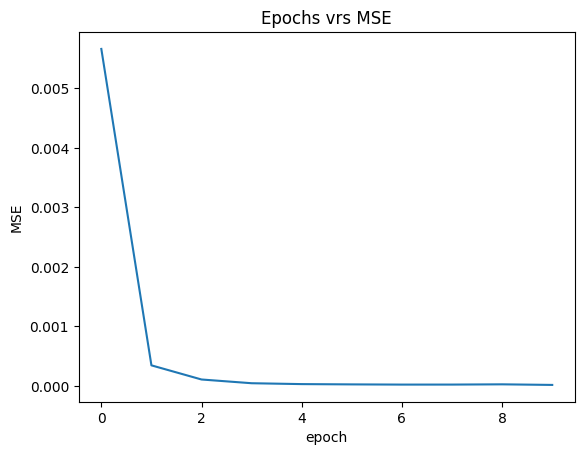

In [ ]:
epochs = history.epoch
loss = history.history['loss']
plt.plot(epochs,loss)
plt.title("Epochs vrs MSE")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.show()

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/your_model.h5')  # Replace 'your_model.h5' with your desired filename

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


634/634 [==============================] - 1s 2ms/step


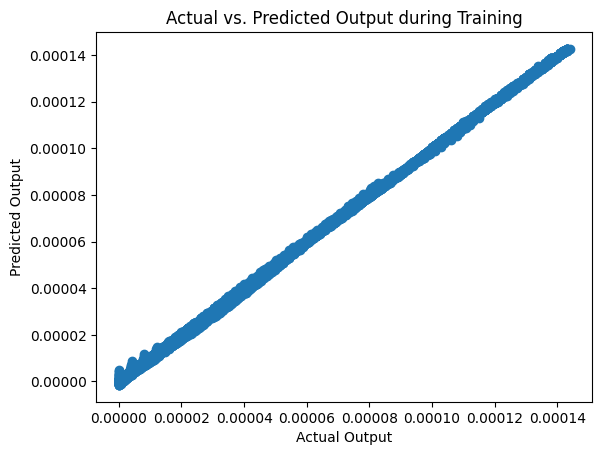

In [ ]:
# Get predictions on the training data
predictions = model.predict(X_train)

# Inverse transform the scaled predictions and actual outputs to get them back to their original scales
predictions = scaler_output.inverse_transform(predictions)
actual_outputs = scaler_output.inverse_transform(y_train)

# Plot scatter plot
plt.scatter(actual_outputs, predictions)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual vs. Predicted Output during Training')
plt.show()


634/634 [==============================] - 2s 3ms/step


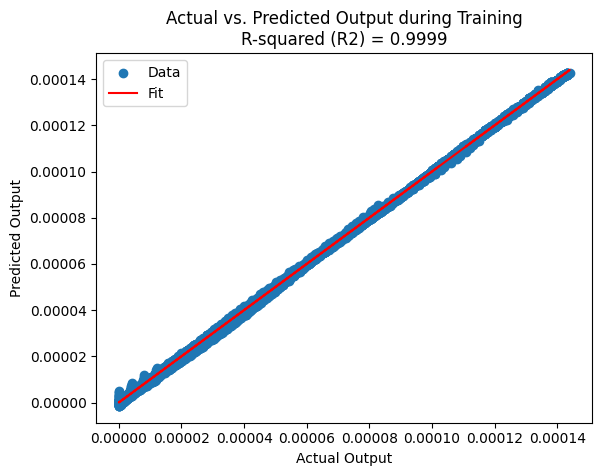

In [ ]:
from sklearn.metrics import r2_score

# Get predictions on the training data
predictions = model.predict(X_train)

# Inverse transform the scaled predictions and actual outputs to get them back to their original scales
predictions = scaler_output.inverse_transform(predictions)
actual_outputs = scaler_output.inverse_transform(y_train)

# Calculate R-squared (R2) value
r2_value = r2_score(actual_outputs, predictions)

# Plot scatter plot
plt.scatter(actual_outputs, predictions, label='Data')  # Label for data points
plt.plot(actual_outputs, actual_outputs, color='red', linestyle='-', label='Fit')  # Regression line as a straight line
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title(f'Actual vs. Predicted Output during Training\nR-squared (R2) = {r2_value:.4f}')  # Set title with R2 value
plt.legend()  # Show legend
plt.show()


In [ ]:
# Define the number of epochs to evaluate
epochs_list = [10, 37, 59, 87, 125]

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Epochs', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2'])

# Iterate over different numbers of epochs
for epochs in epochs_list:
    # Train and evaluate the model
    train_mse, train_r2, test_mse, test_r2 = train_and_evaluate(X_train, y_train, X_test, y_test, epochs)
    # Append results to DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Epochs': [epochs],
                                                      'Train MSE': [train_mse],
                                                      'Train R2': [train_r2],
                                                      'Test MSE': [test_mse],
                                                      'Test R2': [test_r2]})], ignore_index=True)

# Display results
print(results_df)



NameError: name 'train_and_evaluate' is not defined

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define the train_and_evaluate function
def train_and_evaluate(X_train, y_train, X_test, y_test, epochs):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)
    train_predictions = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_predictions = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    return train_mse, train_r2, test_mse, test_r2

# Your data preprocessing and model training code goes here

# Define the number of epochs to evaluate
epochs_list = [10, 37, 59, 87, 125]

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Epochs', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2'])

# Iterate over different numbers of epochs
for epochs in epochs_list:
    # Train and evaluate the model
    train_mse, train_r2, test_mse, test_r2 = train_and_evaluate(X_train, y_train, X_test, y_test, epochs)
    # Append results to DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Epochs': [epochs],
                                                      'Train MSE': [train_mse],
                                                      'Train R2': [train_r2],
                                                      'Test MSE': [test_mse],
                                                      'Test R2': [test_r2]})], ignore_index=True)

# Display results
print(results_df)
# Calculate mean of MSE and R2 for train and test sides
train_mean_mse = results_df['Train MSE'].mean()
train_mean_r2 = results_df['Train R2'].mean()
test_mean_mse = results_df['Test MSE'].mean()
test_mean_r2 = results_df['Test R2'].mean()

# Create a DataFrame to store the mean values
mean_results_df = pd.DataFrame({
    'Side': ['Train', 'Test'],
    'Mean MSE': [train_mean_mse, test_mean_mse],
    'Mean R2': [train_mean_r2, test_mean_r2]
})

# Display mean results
print(mean_results_df)



159/159 [==============================] - 0s 2ms/step
  Epochs  Train MSE  Train R2  Test MSE   Test R2
0     10   0.000016  0.999792  0.000017  0.999791
1     37   0.000008  0.999897  0.000008  0.999897
2     59   0.000008  0.999902  0.000008  0.999902
3     87   0.000005  0.999942  0.000005  0.999942
4    125   0.000008  0.999900  0.000008  0.999902
    Side  Mean MSE   Mean R2
0  Train  0.000009  0.999887
1   Test  0.000009  0.999887


In [ ]:
# Calculate mean of MSE and R2 for train and test sides
train_mean_mse = results_df['Train MSE'].mean()
train_mean_r2 = results_df['Train R2'].mean()
test_mean_mse = results_df['Test MSE'].mean()
test_mean_r2 = results_df['Test R2'].mean()

# Create a DataFrame to store the mean values
mean_results_df = pd.DataFrame({
    'Side': ['Train', 'Test'],
    'Mean MSE': [train_mean_mse, test_mean_mse],
    'Mean R2': [train_mean_r2, test_mean_r2]
})

# Display mean results
print(mean_results_df)


    Side  Mean MSE   Mean R2
0  Train  0.000015  0.999810
1   Test  0.000015  0.999812
